<img src="https://upload.wikimedia.org/wikipedia/commons/9/91/LogoEHTP.jpg" alt="drawing" width="400"/>

# <center>MSDE5</center>
# <center>Project Module 6 : Machine Learning (Data Science)</center>

# <center></center>
# <center>Produced by : El houcine MSELLEK</center>

### Objectifs et données :



Pour notre projet du module 6 « Machine Learning », nous avons opter pour le choix de l’étude de la problématique du sujet « Segmentation des clients » en utilisant la méthode l’analyse « Clustering ».

La problématique est la suivante : Conception et déploiement d’un modèle en ML à partir d’une base de données mise en ligne par The UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/online+retail), cette base de données contient les ventes en ligne, Il s'agit d'un ensemble de données transnationales qui contient toutes les transactions effectuées entre le 12/01/2010 et le 12/09/2011 pour un commerce de détail en ligne hors magasin enregistré et basé au Royaume-Uni.

#
Bien évidemment, il sera nécessaire de mettre le choix sur l’un des modèles à utiliser pour le clustering pour notre jeu de données, et bien avant aussi, faire un data processing des données si nécessaire afin de fiabiliser les prédictions de notre modèle.

# **Machine Learning Project**
### Subject :  Segmentation des clients selon la RFM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Analyse exploratoire des données (EDA)

### Data importing & describing

In [2]:
df = pd.read_excel('data\Online_Retail.xlsx')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [3]:
df.shape

(541909, 8)

La data sujet d'analyse comporte 541909 enregistrements ainsi que 8 features, ce qui représente un très bon échantillon dans l'ensemble, nous allons voir à présent la qualité des informations de chaque features.

In [4]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [5]:
df.describe(include='all').transpose()

count   unique                                 top    freq  \
InvoiceNo    541909.0  25900.0                            573585.0  1114.0   
StockCode      541909     4070                              85123A    2313   
Description    540455     4223  WHITE HANGING HEART T-LIGHT HOLDER    2369   
Quantity     541909.0      NaN                                 NaN     NaN   
InvoiceDate    541909    23260                 2011-10-31 14:41:00    1114   
UnitPrice    541909.0      NaN                                 NaN     NaN   
CustomerID   406829.0      NaN                                 NaN     NaN   
Country        541909       38                      United Kingdom  495478   

                          first                last         mean          std  \
InvoiceNo                   NaT                 NaT          NaN          NaN   
StockCode                   NaT                 NaT          NaN          NaN   
Description                 NaT                 NaT          NaN          NaN   
Quantity                    NaT                 NaT      9.55225   218.081158   
InvoiceDate 2010-12-01 08:26:00 2011-12-09 12:50:00          NaN          NaN   
UnitPrice                   NaT                 NaT     4.611114    96.759853   
CustomerID                  NaT                 NaT  15287.69057  1713.600303   
Country                     NaT                 NaT          NaN          NaN   

                  min      25%      50%      75%      max  
InvoiceNo         NaN      NaN      NaN      NaN      NaN  
StockCode         NaN      NaN      NaN      NaN      NaN  
Description       NaN      NaN      NaN      NaN      NaN  
Quantity     -80995.0      1.0      3.0     10.0  80995.0  
InvoiceDate       NaN      NaN      NaN      NaN      NaN  
UnitPrice   -11062.06     1.25     2.08     4.13  38970.0  
CustomerID    12346.0  13953.0  15152.0  16791.0  18287.0  
Country           NaN      NaN      NaN      NaN      NaN

In [6]:
# Calcul de la correlation entre les variables Quantity et UnitPrice : 
correlation = df['Quantity'].corr(df['UnitPrice'])

In [7]:
print("Corrélation entre Quantity et UnitPrice :", correlation)

Corrélation entre Quantity et UnitPrice : -0.0012349245448702963


La correlation entre les deux variables numérique "Quantity" et "UnitPrice" est très proche de Zéro ce
qui indique qu'il n'y a pas de relation entre ces deux variables.

In [8]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Notre Data présente des manquements au nivau de la description (1454) qui représente 0,27% et le CustomerID avec 135080 valeurs vide qui représente un poids non négligable avec 25% de la taille globale de notre Dataframe, nous allons à présent faire le pré-processing afin de mettre à niveau notre data.

Etat donnée que la segmentation par RFM repose sur les données du porduit (StockCode), la date, 
la quantité, le prix et le client (CustometID), notre pré-processing sera focalisé uniquement sur ces features.

## Analyse exploratoire des données (EDA) 

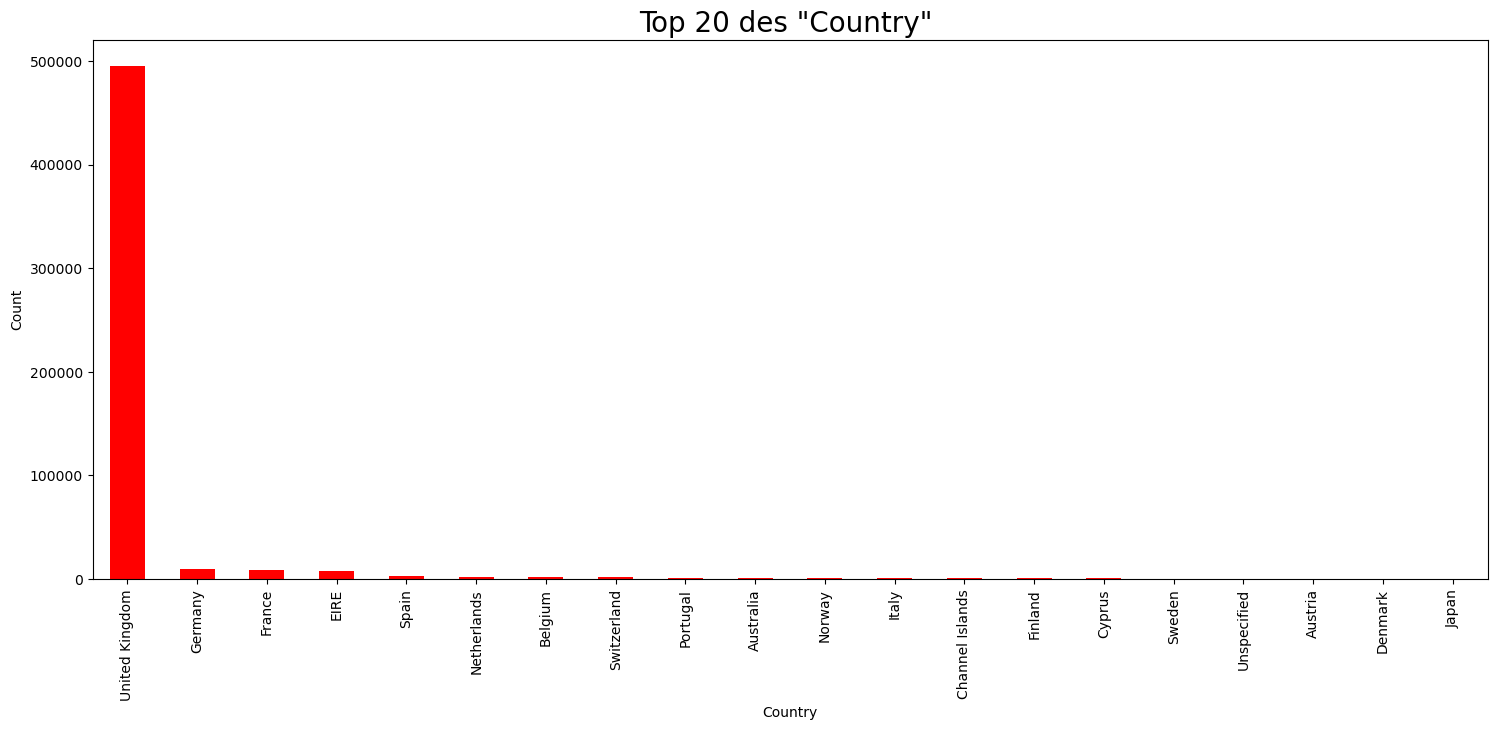

In [10]:
# Classement Top 20 des ventes par 'Country'
df['Country'].value_counts().head(20).plot.bar(color='r', figsize = (18, 7))
plt.title('Top 20 des "Country" ', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [11]:
df.Country.value_counts(normalize=True).head() 

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: Country, dtype: float64

D'après cette analyse, on voie clairement que les pays le plus représenté dans la data est : United Kingdom avec + 90% de valeurs.

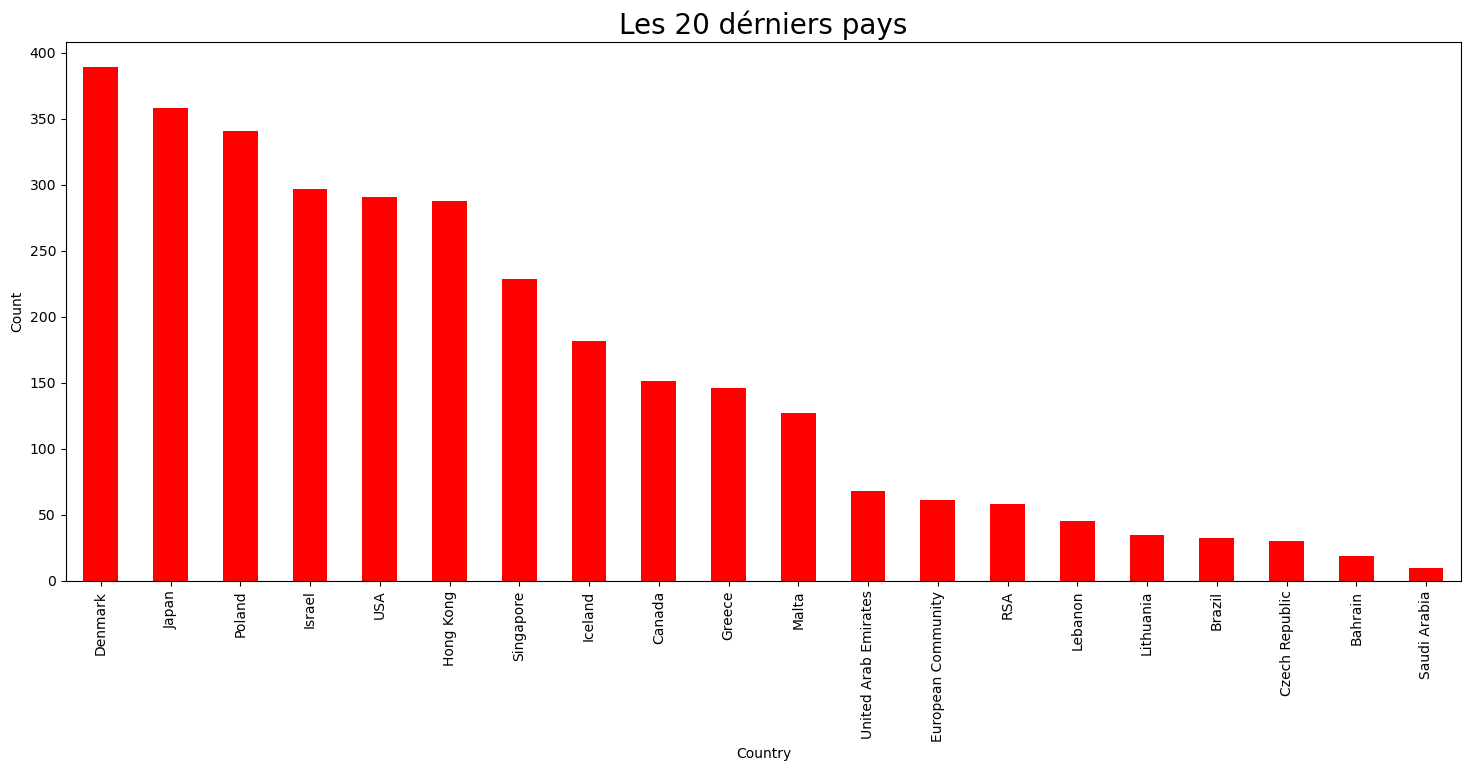

In [12]:
# Ici avec ce graphyque, nous affichons les 20 dernières valeurs uniques des 'Country' :
df['Country'].value_counts().tail(20).plot.bar(color='r',figsize = (18, 7))
plt.title('Les 20 dérniers pays', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Ces pays sont les 20 derniers pays les moins représentés dans notre dataset. 

In [13]:
# Liste des 20 premiers produits en se basant sur la description :
Ld=df['Description'].value_counts().reset_index().rename(columns={'index':'Description',
                                                                  'Description':'Count'}).head(20)
Ld

Description  Count
0   WHITE HANGING HEART T-LIGHT HOLDER   2369
1             REGENCY CAKESTAND 3 TIER   2200
2              JUMBO BAG RED RETROSPOT   2159
3                        PARTY BUNTING   1727
4              LUNCH BAG RED RETROSPOT   1638
5        ASSORTED COLOUR BIRD ORNAMENT   1501
6    SET OF 3 CAKE TINS PANTRY DESIGN    1473
7      PACK OF 72 RETROSPOT CAKE CASES   1385
8              LUNCH BAG  BLACK SKULL.   1350
9      NATURAL SLATE HEART CHALKBOARD    1280
10                             POSTAGE   1252
11             JUMBO BAG PINK POLKADOT   1251
12               HEART OF WICKER SMALL   1237
13            JAM MAKING SET WITH JARS   1229
14              JUMBO STORAGE BAG SUKI   1214
15     PAPER CHAIN KIT 50'S CHRISTMAS    1210
16   JUMBO SHOPPER VINTAGE RED PAISLEY   1202
17                 LUNCH BAG CARS BLUE   1197
18          LUNCH BAG SPACEBOY DESIGN    1192
19              JAM MAKING SET PRINTED   1182

Text(0.5, 1.0, 'Top 20 des produits')

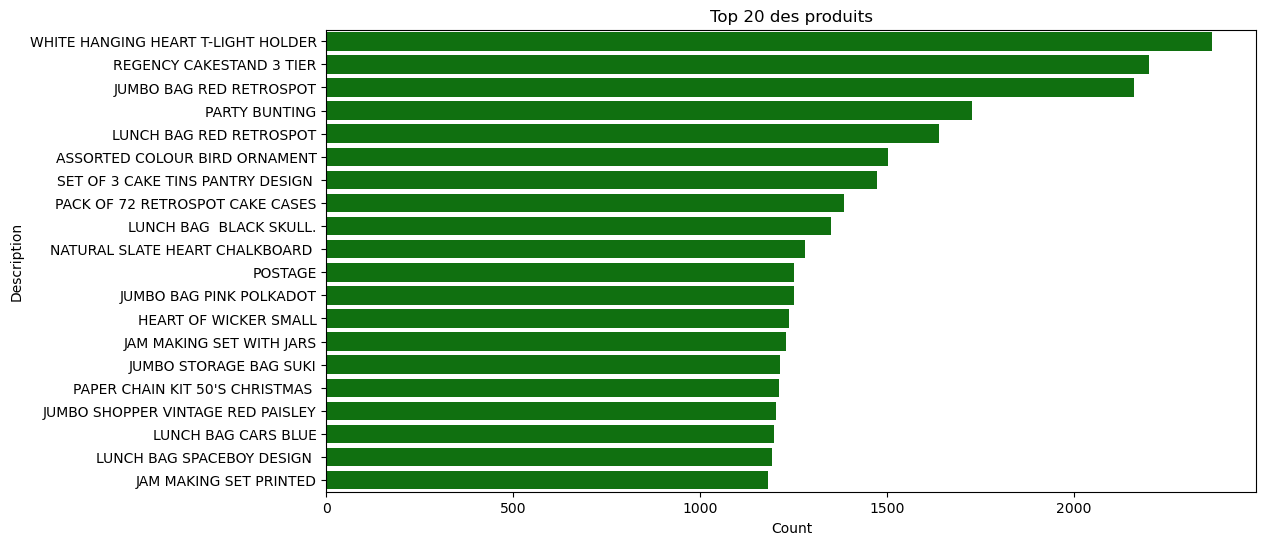

In [15]:
# Top 20 des produits analyser par la description :
plt.figure(figsize=(12,6))
sns.barplot(x=Ld['Count'],y=Ld['Description'],color="g")
plt.title('Top 20 des produits')

Le produit "WHITE HANGING HEART T-LIGHT HOLDER" est le produit le plus vendu avec 2369 opérations.

In [16]:
# Liste des 20 premiers produits en se basant sur le StockCode :
Liste_StockCode=df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(20)
Liste_StockCode

StockCode  Count
0     85123A   2313
1      22423   2203
2     85099B   2159
3      47566   1727
4      20725   1639
5      84879   1502
6      22720   1477
7      22197   1476
8      21212   1385
9      20727   1350
10     22383   1348
11     22457   1280
12     23203   1267
13      POST   1256
14     22386   1251
15     22469   1239
16     22960   1229
17     21931   1214
18     22086   1210
19     22411   1202

Text(0.5, 1.0, 'Top 20 des produits')

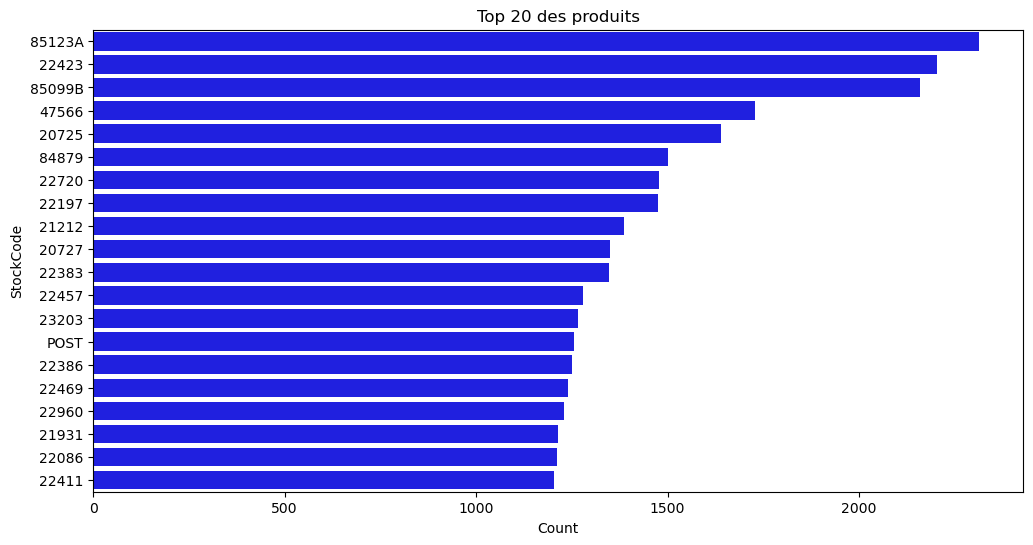

In [17]:
# Top 20 des produits analyser par le StockCode :
plt.figure(figsize=(12,6))
sns.barplot(x=Liste_StockCode['Count'],y=Liste_StockCode['StockCode'],color="b")
plt.title('Top 20 des produits')

Le StockCode "85123A" et le produit le plus vendu suivant les données de notre Dataset. avec 2313 opération de vente.

In [18]:
# Liste des 20 premiers client en se basant sur le CustomerID :
Liste_CustomerID=df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Count'}).head(20)
Liste_CustomerID

CustomerID  Count
0      17841.0   7983
1      14911.0   5903
2      14096.0   5128
3      12748.0   4642
4      14606.0   2782
5      15311.0   2491
6      14646.0   2085
7      13089.0   1857
8      13263.0   1677
9      14298.0   1640
10     15039.0   1508
11     14156.0   1420
12     18118.0   1284
13     14159.0   1212
14     14796.0   1165
15     15005.0   1160
16     16033.0   1152
17     14056.0   1128
18     14769.0   1094
19     17511.0   1076

Text(0.5, 1.0, 'Top 20 des Customer')

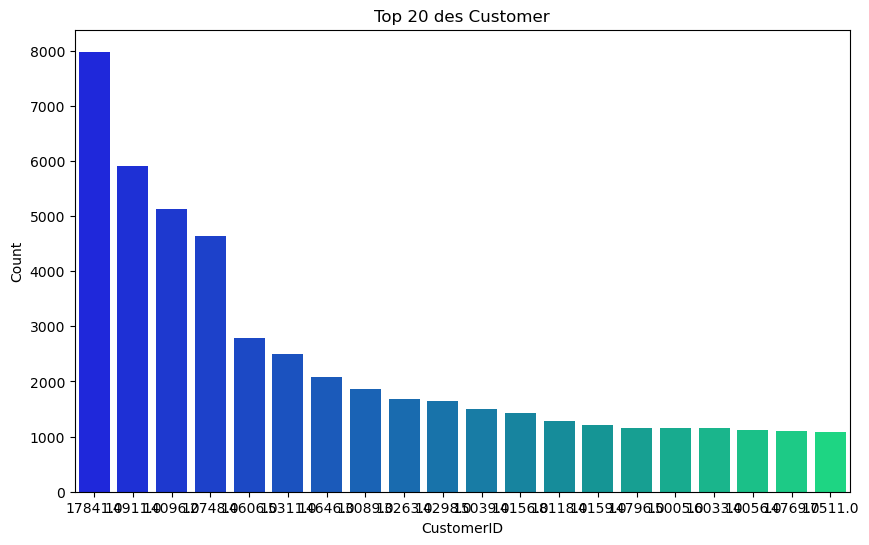

In [65]:
# Top 20 des clients :
plt.figure(figsize=(10,6))
sns.barplot(x=Liste_CustomerID['CustomerID'],y=Liste_CustomerID['Count'],palette="winter",order=Liste_CustomerID.sort_values('Count',ascending = False).CustomerID)
plt.title('Top 20 des Customer')

Le client ayant effectué le plus grand nombre d'opération d'achat est le CustomerID N° : 17841

In [64]:
resultat = df.loc[(df['CustomerID'] == 17841.0)]
resultat

InvoiceNo StockCode                      Description  Quantity  \
2037      536557     21495       SKULLS AND CROSSBONES WRAP        25   
2038      536557    46000R     POLYESTER FILLER PAD 45x30cm         2   
2039      536557    46000S     POLYESTER FILLER PAD 40x40cm         1   
2040      536557     22731    3D CHRISTMAS STAMPS STICKERS          1   
2041      536557     21258       VICTORIAN SEWING BOX LARGE         1   
...          ...       ...                              ...       ...   
537749    581334     23399    HOME SWEET HOME HANGING HEART         3   
537750    581334     22893   MINI CAKE STAND T-LIGHT HOLDER        12   
537751    581334     22371     AIRLINE BAG VINTAGE TOKYO 78         1   
537752    581334     22309             TEA COSY RED  STRIPE         1   
537753    581334     21926  RED/CREAM STRIPE CUSHION COVER          8   

       InvoiceDate  UnitPrice  CustomerID         Country  InvoiceYearMonth  \
2037    2010-12-01       0.42     17841.0  United Kingdom            201012   
2038    2010-12-01       1.45     17841.0  United Kingdom            201012   
2039    2010-12-01       1.45     17841.0  United Kingdom            201012   
2040    2010-12-01       1.25     17841.0  United Kingdom            201012   
2041    2010-12-01      12.75     17841.0  United Kingdom            201012   
...            ...        ...         ...             ...               ...   
537749  2011-12-08       0.85     17841.0  United Kingdom            201112   
537750  2011-12-08       0.42     17841.0  United Kingdom            201112   
537751  2011-12-08       4.25     17841.0  United Kingdom            201112   
537752  2011-12-08       2.55     17841.0  United Kingdom            201112   
537753  2011-12-08       1.25     17841.0  United Kingdom            201112   

              Date  montant  
2037    2010-12-01    10.50  
2038    2010-12-01     2.90  
2039    2010-12-01     1.45  
2040    2010-12-01     1.25  
2041    2010-12-01    12.75  
...            ...      ...  
537749  2011-12-08     2.55  
537750  2011-12-08     5.04  
537751  2011-12-08     4.25  
537752  2011-12-08     2.55  
537753  2011-12-08    10.00  

[7847 rows x 11 columns]

In [21]:
# Liste des 5 premiers clients en se basant sur le CustomerID et le Country :
LCC=df['Country'].value_counts().reset_index().rename(columns={'index':'Country',
                                                               'Country':'CustomerID_Count'}).head(5)
LCC

Country  CustomerID_Count
0  United Kingdom            495478
1         Germany              9495
2          France              8557
3            EIRE              8196
4           Spain              2533

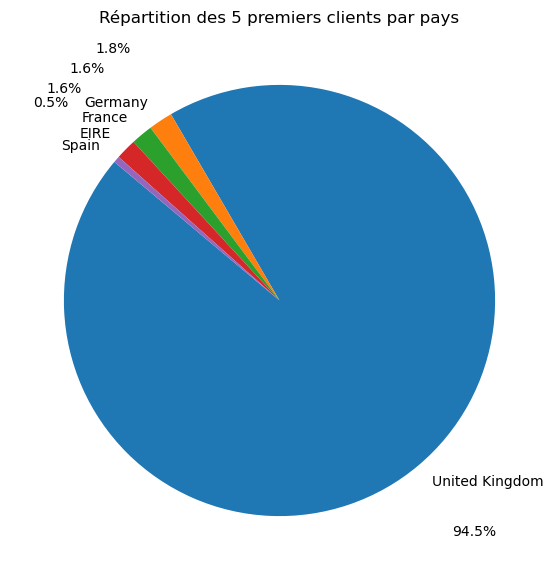

In [63]:
plt.figure(figsize=(8, 7))
plt.pie(LCC['CustomerID_Count'], 
        labels=LCC['Country'], autopct='%1.1f%%', startangle=140,pctdistance=1.4)
plt.title("Répartition des 5 premiers clients par pays")

# Afficher le graphique
plt.show()

D'après ce graphique, il y a une forte concentration de la clientelle au niveau du pays 'United Kingdom', suivi par la Germany et la France.

In [23]:
#Re-traitement de la variale 'InvoiceDate' :

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

L'objectif est de pouvoir analyser les timeserise plus facilement car la variable InvoiceDate inclu aussi le Time (Heure, Minute )

In [62]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  InvoiceYearMonth  \
0  2010-12-01       2.55     17850.0  United Kingdom            201012   
1  2010-12-01       3.39     17850.0  United Kingdom            201012   
2  2010-12-01       2.75     17850.0  United Kingdom            201012   
3  2010-12-01       3.39     17850.0  United Kingdom            201012   
4  2010-12-01       3.39     17850.0  United Kingdom            201012   

         Date  montant  
0  2010-12-01    15.30  
1  2010-12-01    20.34  
2  2010-12-01    22.00  
3  2010-12-01    20.34  
4  2010-12-01    20.34

In [60]:
#Regroupement des quantités par date 'Année-mois' :
df_date= df.groupby("Date").Quantity.sum()
df_date=pd.DataFrame(df_date)
df_date=df_date.reset_index()
df_date

Date  Quantity
0    2010-12-01     21310
1    2010-12-02     30988
2    2010-12-03      7648
3    2010-12-05     13659
4    2010-12-06     15535
..          ...       ...
300  2011-12-05     36677
301  2011-12-06     25914
302  2011-12-07     29079
303  2011-12-08     25444
304  2011-12-09     87167

[305 rows x 2 columns]

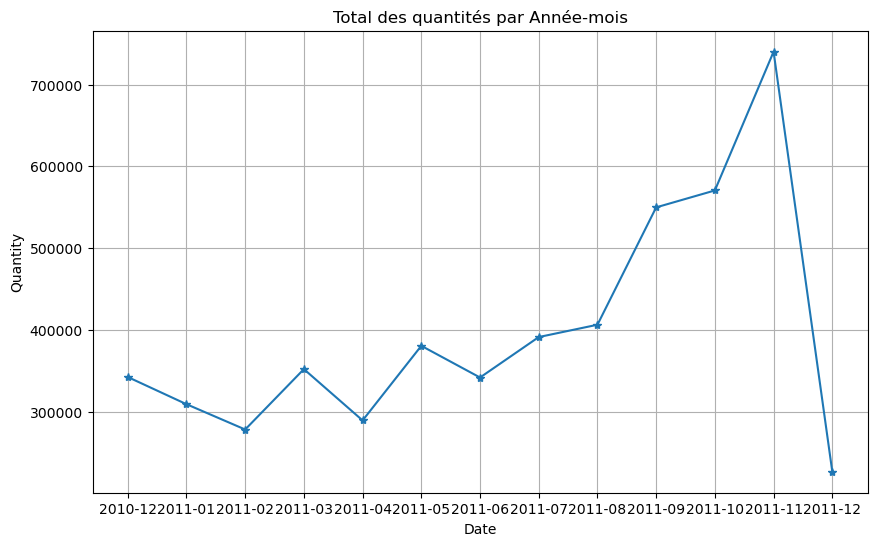

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(df_date['Date'], df_date['Quantity'], marker='*', linestyle='-')

plt.title("Total des quantités par Année-mois")
plt.xlabel("Date")
plt.ylabel("Quantity")

plt.grid(True)
plt.show()


Je me suis basé sur le cumule des quantités, nous constatons que le pic des ventes est réalisé durant le mois 11-2021. ceci peu influancer la tandance des résultats car il sera considéré comme étant un Outlayer.

In [27]:
# L'ajout de la variable montant : montant = Quantity * UnitPrice
df['montant'] = df['Quantity']*df['UnitPrice']

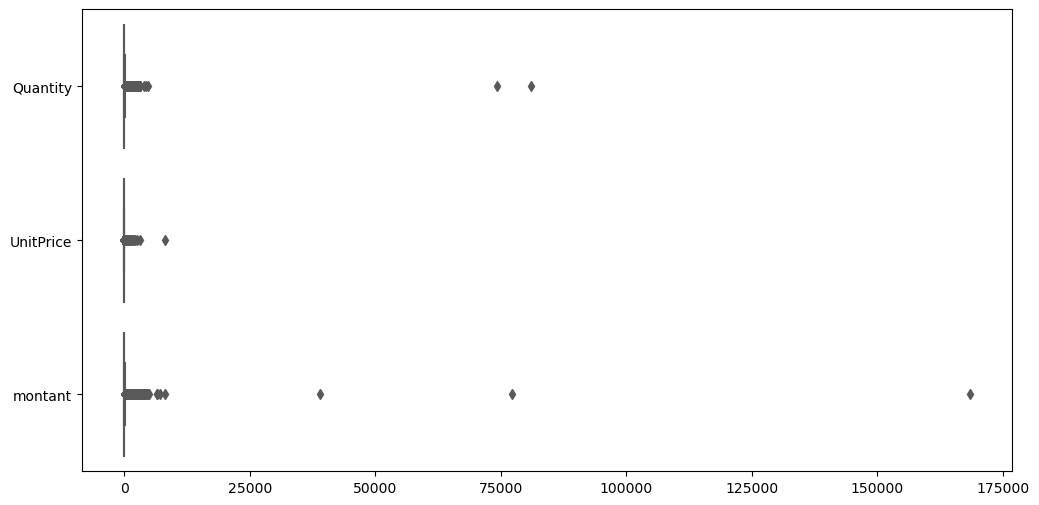

In [58]:
# Affichage des boite à mustache :
plt.figure(figsize=(12, 6)) 
df_bp = df[['Quantity', 'UnitPrice', 'montant']]
sns.boxplot(data=df_bp, orient="h", palette="Set2") 
plt.show()

Les Boxplots des variables numérique demontre qu'il y a une très forte dispersion des valeurs, le dataset présente des outlayer qu'il faudra nécessairement analyser et traiter.

### Conclusion :
Notre dataset présente des données manquantes pour certains les variables qualitatives CustomerID et
Description, et des outlayer pour les variables numériques, ceci dit, il sera nécessaire de réaliser le pre-processing pour notre data pour une meilleur fiabilité des résultats

# Pré-processing des données 

#### Data Cleaning

In [29]:
# Remplacement des valeurs vide de la variable "Description" par le contenu de la variable "StockCode" 
# Vue qu'il sont etroitement liée l'un par l'autre.

In [30]:
df['Description'].fillna(df['StockCode'], inplace=True)

In [31]:
# Elimination des lignes avec prix=zéro, et/ou Quantity=zéro :

In [32]:
df = df[df['UnitPrice'] != 0]

In [33]:
df = df[df['Quantity'] != 0]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         354321 non-null  object 
 1   StockCode         354321 non-null  object 
 2   Description       354321 non-null  object 
 3   Quantity          354321 non-null  int64  
 4   InvoiceDate       354321 non-null  object 
 5   UnitPrice         354321 non-null  float64
 6   CustomerID        354321 non-null  float64
 7   Country           354321 non-null  object 
 8   InvoiceYearMonth  354321 non-null  int64  
 9   Date              354321 non-null  object 
 10  montant           354321 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 32.4+ MB


Suivant les informations recuillées sur le site, les invoiceNo annullés sont débuté
du numéro par la lettre "C"

In [57]:
# Filttrage des données :
filtered_df = df[df['InvoiceNo'].str.startswith('C', na=False)]
invoice_counts = filtered_df.groupby('Country')['InvoiceNo'].count()

plt.figure(figsize=(8, 6))
ax = invoice_counts.plot(kind='bar', color='skyblue')
invoice_counts.plot(kind='bar', color='skyblue')
plt.title("Nombre des InvoiceNo annulés / Country")
plt.xlabel("InvoiceNo")
plt.ylabel("Count")

for i, v in enumerate(invoice_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)
    
plt.show()

AttributeError: Can only use .str accessor with string values!

In [67]:
max_quantity = filtered_df['Quantity'].max()
min_quantity = filtered_df['Quantity'].min()

print("Maximum de Quantity :", max_quantity)
print("Minimum de Quantity :", min_quantity)

Maximum de Quantity : nan
Minimum de Quantity : nan


Tous les quantités des InvoiceNo annulées sont négatifs (donc réellement annulée), et la gross part des opérations annulée est détenu pas l'United Kingdom. nous allons procéder à la suppression de ces valeurs :

In [68]:
mask = df['InvoiceNo'].apply(lambda x: not isinstance(x, str) or not x.startswith('C'))
df = df[mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         354321 non-null  object 
 1   StockCode         354321 non-null  object 
 2   Description       354321 non-null  object 
 3   Quantity          354321 non-null  int64  
 4   InvoiceDate       354321 non-null  object 
 5   UnitPrice         354321 non-null  float64
 6   CustomerID        354321 non-null  float64
 7   Country           354321 non-null  object 
 8   InvoiceYearMonth  354321 non-null  int64  
 9   Date              354321 non-null  object 
 10  montant           354321 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 32.4+ MB


Il reste à présent la variable "CustomerID" dans laquel il y a des valeurs vide à vérifier et à tariter :

IndexError: index 0 is out of bounds for axis 0 with size 0

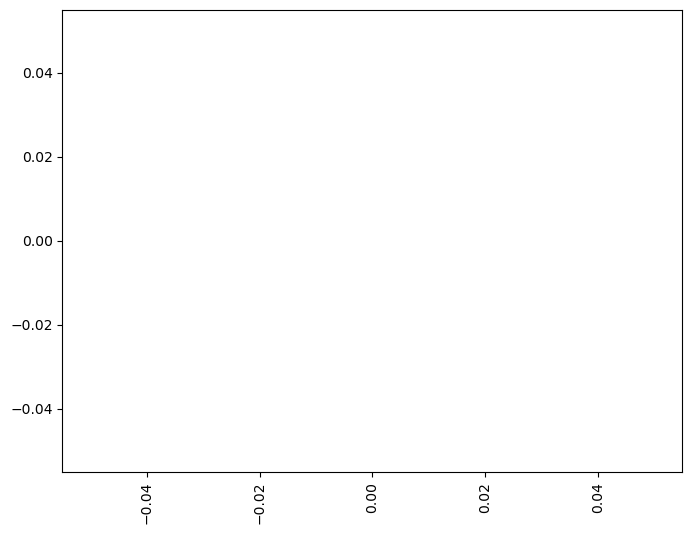

In [69]:
# Filtrer les lignes où 'CustomerID' est vide
filtered_df = df[df['CustomerID'].isna()]
CustomerID_counts = filtered_df.groupby('Country')['InvoiceNo'].count()

plt.figure(figsize=(8, 6))
ax = CustomerID_counts.plot(kind='bar', color='skyblue')
CustomerID_counts.plot(kind='bar', color='skyblue')
plt.title("Nombre des InvoiceNo sans CustomerID / Country")
plt.xlabel("Country")
plt.ylabel("Count")

for i, v in enumerate(CustomerID_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)
    
plt.show()

In [70]:
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         354321 non-null  object 
 1   StockCode         354321 non-null  object 
 2   Description       354321 non-null  object 
 3   Quantity          354321 non-null  int64  
 4   InvoiceDate       354321 non-null  object 
 5   UnitPrice         354321 non-null  float64
 6   CustomerID        354321 non-null  float64
 7   Country           354321 non-null  object 
 8   InvoiceYearMonth  354321 non-null  int64  
 9   Date              354321 non-null  object 
 10  montant           354321 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 32.4+ MB


In [71]:
df = df[df['Country'] == 'United Kingdom']

#### Conclusion :

Après l'analyse et le Cleaning de notre Dataset, nous avons gardé uniquement 397884 valeurs. Nous avons supprimé environ 27% de la data. C'est pour le bien de notre étude et pour la suite :). De plus nous allons garder uniquement les ventes réalisées par les clients du Country « United Kindom » car ils représentent la majorité des valeurs de notre Data (91%). 

# Construction des modèles ML

## Feature set

In [73]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceYearMonth', 'Date',
       'montant'],
      dtype='object')

Pour notre projet de ML par Clustering avec comme target les variables RFM à calculer, nous aurons besoin uniquement des featurs suivants : InvoiceNo, CustomerID, montant et la Date

In [74]:
import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

In [75]:
# la dernière date dans la colonne 'Date'
latest_date = df['InvoiceDate'].max()
print("Dernière date dans notre dataset est :", latest_date)

Dernière date dans notre dataset est : 2011-12-09


In [76]:
# Fixation de la variale NOW à la dernière date de la data pour calculer la récence
NOW = dt.date(2011,12,9) 
df['InvoiceDate'] = pd.DatetimeIndex(df.InvoiceDate).date

In [77]:
#Calcul de la recency pour chaque CustomerID unique :

df_recency = df.groupby(['CustomerID'],as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

CustomerID  Recency
0     12346.0      325
1     12747.0        2
2     12748.0        0
3     12749.0        3
4     12820.0        3

In [78]:
#Calcule de la Frequency et Monetarty pour chaque client :
#Frequency : le nombre de Invoice par CustomerID
#Monetarty : La somme des montant par CustomerID

FM = df.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x),
                                         'montant'  : lambda x:x.sum()})
FM.rename(columns = {'InvoiceNo' :'Frequency',
                           'montant':'Monetary'},inplace= True)
FM.head()

Frequency  Monetary
CustomerID                     
12346.0             1  77183.60
12747.0           103   4196.01
12748.0          4595  33719.73
12749.0           199   4090.88
12820.0            59    942.34

In [152]:
# Regroupement des 3 variables R F M :
RFM= df_recency.merge(FM,left_on='CustomerID',right_on='CustomerID')
RFM.head()
     

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12747.0        2        103   4196.01
2     12748.0        0       4595  33719.73
3     12749.0        3        199   4090.88
4     12820.0        3         59    942.34

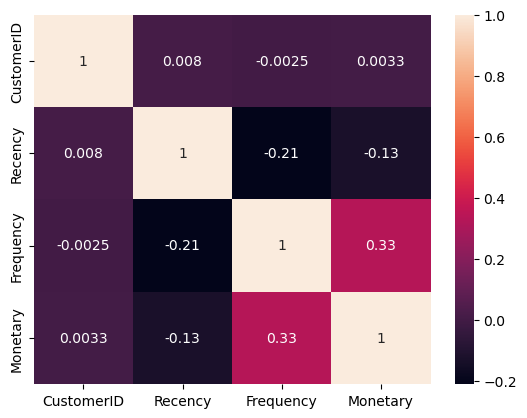

In [85]:
#carte de chaleur de la correlation entre les variables :
sns.heatmap(RFM.corr(), annot=True);

Nous constatons avec le heatmap qu'il y a une relation entre la frequency et la monetary, mais elle n'pas trop importante (0,33) 

In [86]:
# Affichage graphique en boite à moustache : 
BAM = RFM.drop('CustomerID',axis=1)
BAM.head()

Recency  Frequency  Monetary
0      325          1  77183.60
1        2        103   4196.01
2        0       4595  33719.73
3        3        199   4090.88
4        3         59    942.34

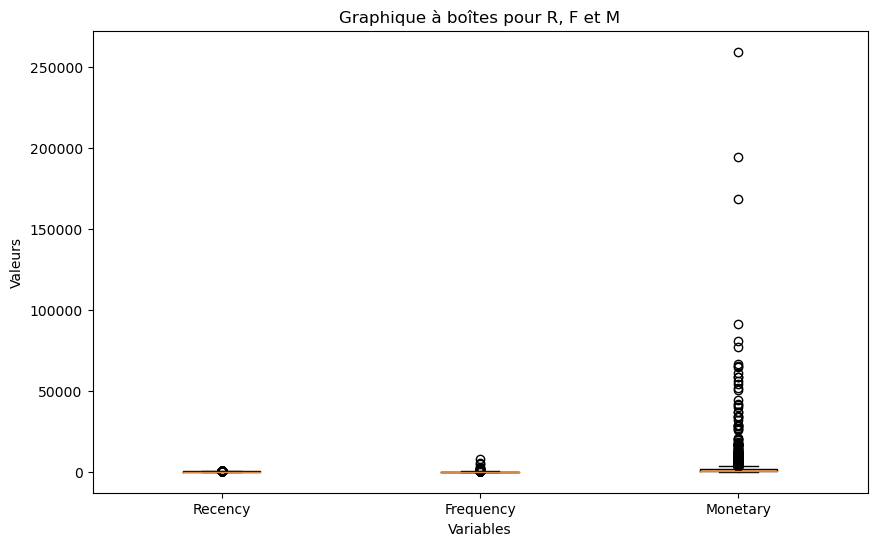

In [87]:
variables = ['Recency', 'Frequency', 'Monetary']

plt.figure(figsize=(10, 6))
plt.boxplot([BAM[var] for var in variables], labels=variables)
plt.title("Graphique à boîtes pour R, F et M")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.show()

Il y a une très forte dispersion des valeurs au tour de la moyenne .... 
Afin de bien étudier nos variables R, F et M nous allons utiliser la normalisation pour standardiser les valeurs.

## Normalize Data 

In [88]:
X = BAM

In [89]:
BAM.head()

Recency  Frequency  Monetary
0      325          1  77183.60
1        2        103   4196.01
2        0       4595  33719.73
3        3        199   4090.88
4        3         59    942.34

In [90]:
X.head()

Recency  Frequency  Monetary
0      325          1  77183.60
1        2        103   4196.01
2        0       4595  33719.73
3        3        199   4090.88
4        3         59    942.34

In [94]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

X = preprocessing.MinMaxScaler().fit(X).transform(X)
X=pd.DataFrame(X)
X = X.rename(columns={0: 'R', 1: 'F', 2: 'M'})
X.head()

R         F         M
0  0.871314  0.000000  0.297242
1  0.005362  0.013000  0.016146
2  0.000000  0.585521  0.129850
3  0.008043  0.025236  0.015741
4  0.008043  0.007392  0.003615

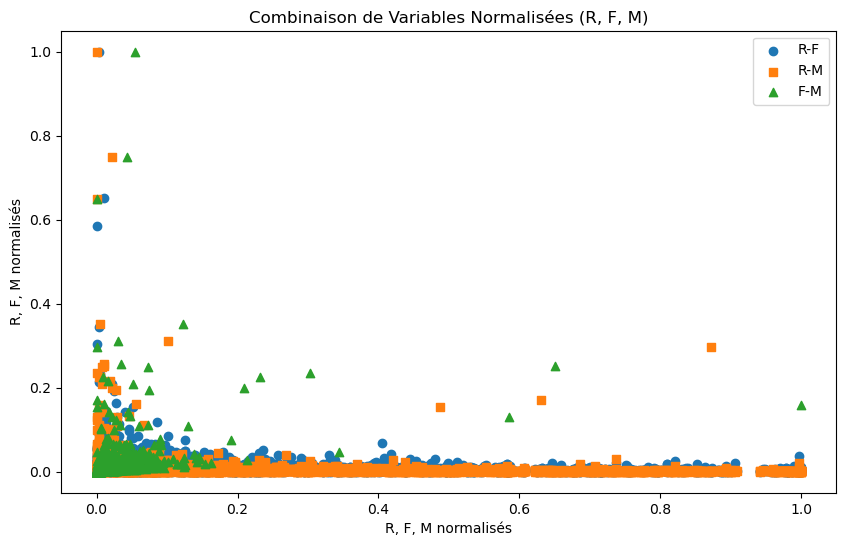

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(X['R'], X['F'], label='R-F', marker='o')
plt.scatter(X['R'], X['M'], label='R-M', marker='s')
plt.scatter(X['F'], X['M'], label='F-M', marker='^')
plt.title("Combinaison de Variables Normalisées (R, F, M)")
plt.xlabel("R, F, M normalisés")
plt.ylabel("R, F, M normalisés")
plt.legend()
plt.show()

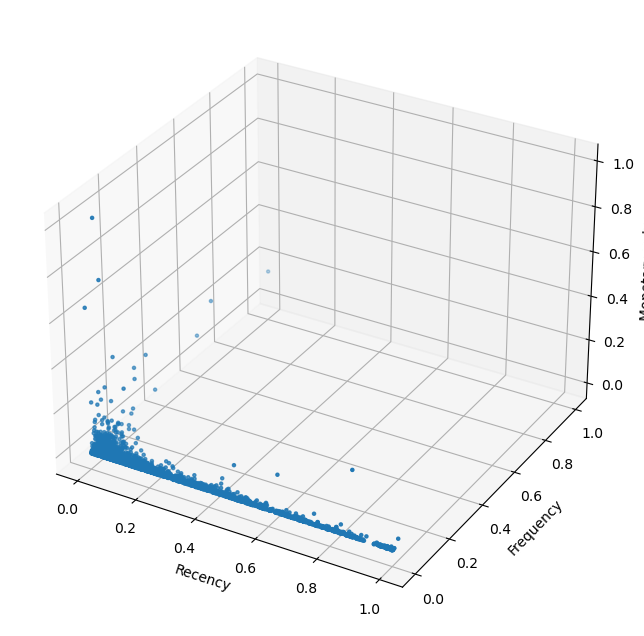

In [96]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=X['R']
ys=X['F']
zs=X['M']
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

Nous allon appliqué une autre normalisation (log1p), car celle-ci ne permette pas d'avoir une lecture facile des tandances.

In [97]:
X2=BAM

In [98]:
X2['Recency_log'] = np.log1p(X2['Recency'])
X2['Frequency_log'] =  np.log1p(X2['Frequency'])
X2['Monetary_log'] =  np.log1p(X2['Monetary'])
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X=X2[feature_vector].values
scaler=preprocessing.StandardScaler()
X_scaled=scaler.fit_transform(X)

In [151]:
X2.head()

Recency  Frequency  Monetary  Recency_log  Frequency_log  Monetary_log  \
0      325          1  77183.60     5.786897       0.693147     11.253955   
1        2        103   4196.01     1.098612       4.644391      8.342128   
2        0       4595  33719.73     0.000000       8.432942     10.425868   
3        3        199   4090.88     1.386294       5.298317      8.316760   
4        3         59    942.34     1.386294       4.094345      6.849427   

   Clus_km  
0        0  
1        2  
2        2  
3        2  
4        2

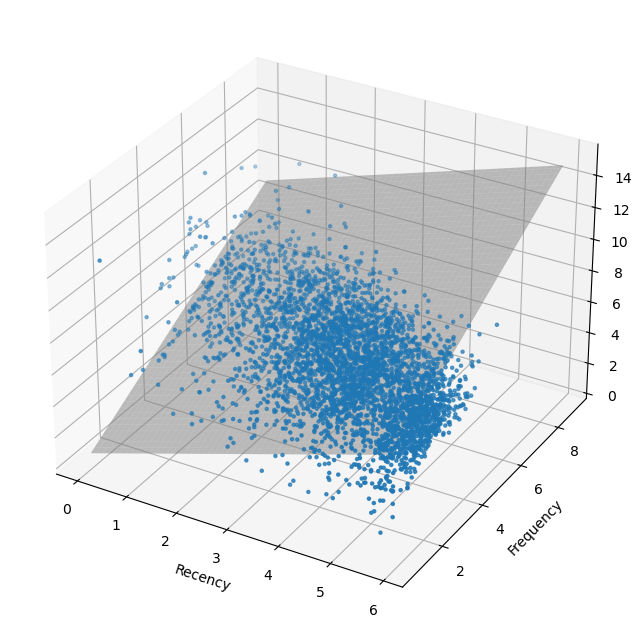

In [100]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=X2['Recency_log']
ys=X2['Frequency_log']
zs=X2['Monetary_log']
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

X_fit, Y_fit = np.meshgrid(np.linspace(xs.min(), xs.max(), 100), np.linspace(ys.min(), ys.max(), 100))
Z_fit = X_fit + Y_fit 

ax.plot_surface(X_fit, Y_fit, Z_fit, color='gray', alpha=0.5, label='Tendance')


plt.show()

En appliqant cette transformation avec le log1p, nous avons mainteant une bonne destribution des valeurs.

Nous pouvons observer que d'après le graphique en 3D, les Customer qui achètent plus fréquemment et plus récemment ont tendance à dépenser davantage, en se basant sur la tendance croissante de la valeur monétaire correspondant à la tendance croissante et décroissante de la fréquence et de la récence, respectivement.

# Construction des modèles ML 

## KMeans Clustering

In [107]:
X = X2[['Recency_log','Frequency_log','Monetary_log']]

In [108]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(init = "k-means++", n_clusters = 4, n_init = 15)
kmeans_model.fit(X)

KMeans(n_clusters=4, n_init=15)

In [109]:
print(kmeans_model.cluster_centers_)

[[4.15893538 4.2915309  7.0572417 ]
 [2.99269974 3.14953898 5.89354796]
 [2.01850066 5.20633527 8.06408841]
 [5.16105732 2.54625251 5.4603433 ]]


In [110]:
print(kmeans_model.labels_)

[0 2 2 ... 1 2 0]


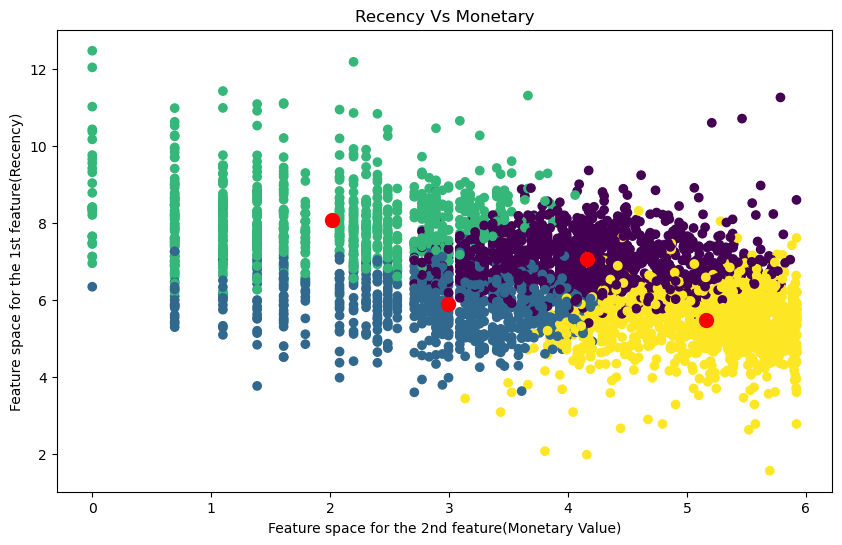

In [111]:
plt.figure(figsize=(10,6))
# Show the data points
plt.scatter(X['Recency_log'],X['Monetary_log'], c=kmeans_model.labels_)
plt.title('Recency Vs Monetary')
plt.xlabel('Feature space for the 2nd feature(Monetary Value)')
plt.ylabel('Feature space for the 1st feature(Recency)')
# Show the centres
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,2], s=100, color="red")


In [112]:
from sklearn.metrics import silhouette_score
s_score = silhouette_score(X, kmeans_model.labels_)
print("silhouette score is : ", round(s_score,2))

silhouette score is :  0.31


In [113]:
kmeans_model2 = KMeans(init = "k-means++", n_clusters = 4, n_init = 15)
kmeans_model2.fit(X)

KMeans(n_clusters=4, n_init=15)

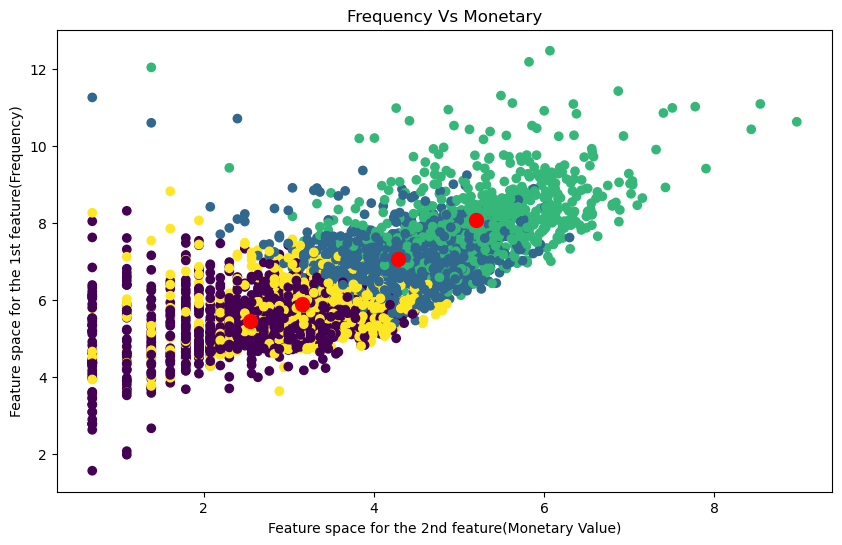

In [114]:
plt.figure(figsize=(10,6))
# Show the data points
plt.scatter(X['Frequency_log'],X['Monetary_log'], c=kmeans_model2.labels_)
plt.title('Frequency Vs Monetary')
plt.xlabel('Feature space for the 2nd feature(Monetary Value)')
plt.ylabel('Feature space for the 1st feature(Frequency)')
# Show the centres
plt.scatter(kmeans_model2.cluster_centers_[:,1], kmeans_model2.cluster_centers_[:,2], s=100, color="red")


In [116]:
from sklearn.metrics import silhouette_score
s_score = silhouette_score(X, kmeans_model2.labels_)
print("silhouette score is : ", round(s_score,2))

silhouette score is :  0.31


In [117]:
X_Elbow = np.asarray(X)

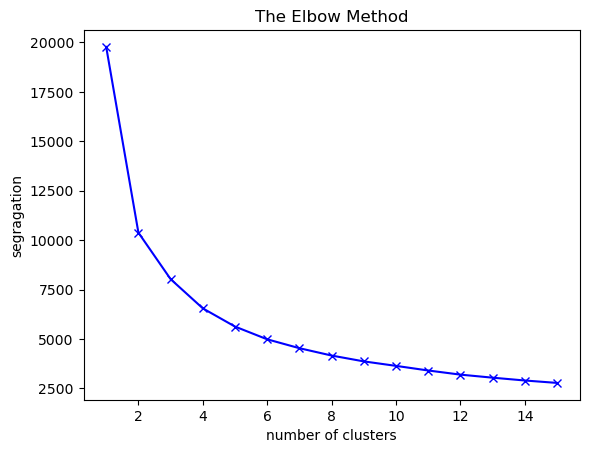

In [118]:

L = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_Elbow)
    L.append(km.inertia_)

plt.plot(K, L, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('segragation')
plt.show()

In [120]:
print("the inertia attribute is : ", round(kmeans_model.inertia_,2))

the inertia attribute is :  6547.1


## DBSCAN Clustering

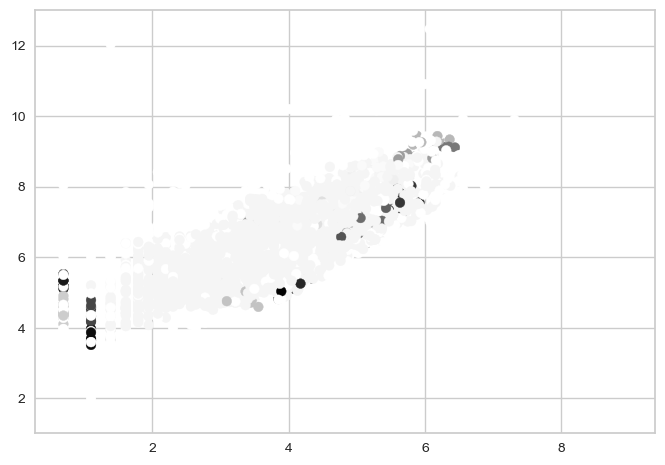

In [135]:
from sklearn.cluster import DBSCAN
dbscan_model3 = DBSCAN(eps=0.3)
dbscan_model3.fit(X_Elbow)
plt.scatter(X_Elbow[:,1], X_Elbow[:,2], c=dbscan_model3.labels_);

Comparaison entre les deux modèles :

In [136]:
s_score_kmeans = silhouette_score(X, kmeans_model.labels_)
s_score_kmeans2 = silhouette_score(X, kmeans_model2.labels_)
s_score_dbscan = silhouette_score(X, dbscan_model3.labels_)
print("silhouette score of K-Means R-M is : ", round(s_score_kmeans,2))
print("silhouette score of K-Means F-M is : ", round(s_score_kmeans2,2))
print("silhouette score of DBSCAN is : ", round(s_score_dbscan,2))

silhouette score of K-Means R-M is :  0.31
silhouette score of K-Means F-M is :  0.31
silhouette score of DBSCAN is :  -0.42


## *Cross verifying with ElbowVisualizar*

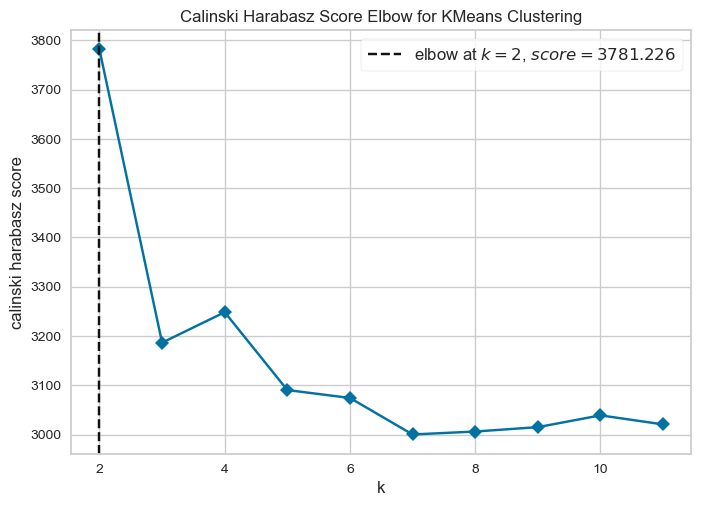

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [144]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [143]:
# Mise en liste des variable Recency_log et Monetary_log
Recency_and_Monetary_feat=['Recency_log','Monetary_log']
X=X2[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4218583215566859
For n_clusters = 3, silhouette score is 0.3439495737944021
For n_clusters = 4, silhouette score is 0.36607919389472515
For n_clusters = 5, silhouette score is 0.3328989586117931
For n_clusters = 6, silhouette score is 0.34258403146305993
For n_clusters = 7, silhouette score is 0.3352758320703183
For n_clusters = 8, silhouette score is 0.3377764920681545
For n_clusters = 9, silhouette score is 0.348169368284875
For n_clusters = 10, silhouette score is 0.3493757188414395
For n_clusters = 11, silhouette score is 0.33925114897261244
For n_clusters = 12, silhouette score is 0.3470375009879895
For n_clusters = 13, silhouette score is 0.3421351155947708
For n_clusters = 14, silhouette score is 0.33570587977352734
For n_clusters = 15, silhouette score is 0.3366490105109148


D'après ces graphiques, le modèle le plus performant est : le Kmaens.

<h2 id="insights">Insights</h2>
Affectation des labels pour chaque ligne de notre dataset.

In [138]:
X2["Clus_km"] = kmeans_model.labels_
X2.head(5)

Recency  Frequency  Monetary  Recency_log  Frequency_log  Monetary_log  \
0      325          1  77183.60     5.786897       0.693147     11.253955   
1        2        103   4196.01     1.098612       4.644391      8.342128   
2        0       4595  33719.73     0.000000       8.432942     10.425868   
3        3        199   4090.88     1.386294       5.298317      8.316760   
4        3         59    942.34     1.386294       4.094345      6.849427   

   Clus_km  
0        0  
1        2  
2        2  
3        2  
4        2

Visulalisation des centroid par une moyenne the features pour chauque clustre.

In [139]:
X2.groupby('Clus_km').mean()

Recency   Frequency     Monetary  Recency_log  Frequency_log  \
Clus_km                                                                    
0         81.558319   87.358491  1554.125706     4.158935       4.291531   
1         24.916773   28.962868   459.169334     2.991502       3.152487   
2          9.767766  267.552030  6060.968706     2.017215       5.208634   
3        200.316456   16.042194   305.169950     5.161057       2.546253   

         Monetary_log  
Clus_km                
0            7.057242  
1            5.896045  
2            8.067122  
3            5.460343

In [141]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

x_data=['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
cutoff_quantile=100
field_to_plot='Recency'
y0 = X2[X2['Clus_km']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]

y1=X2[X2['Clus_km']==1][field_to_plot].values
y1=y1[y1<np.percentile(y1,cutoff_quantile)]

y2 = X2[X2['Clus_km']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y3 = X2[X2['Clus_km']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]


y_data=[y0,y1,y2,y3]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(14, 88, 74, 0.5)', 'rgba(44, 187, 8, 0.5)']
traces=[]

for xd,yd,cls in zip(x_data,y_data,colors):
    traces.append(go.Box(y=yd,
                         name=xd,
                         boxpoints=False,
                         jitter=0.5,
                         whiskerwidth=0.2,
                         fillcolor=cls,
                         marker=dict(size=2,),
                         line=dict(width=1),
                        ))
layout=go.Layout(
title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
yaxis=dict(autorange=True,
           showgrid=True,
           zeroline=True,
           dtick=50,
           gridcolor='rgb(255, 255, 255)',
           gridwidth=0.1,
           zerolinecolor='rgb(255,255,255)',
           zerolinewidth=2,),
margin=dict(
    l=40,
    r=30,
    b=80,
    t=100,
),
paper_bgcolor='rgb(243, 243, 243)',
plot_bgcolor='rgb(243, 243, 243)',
showlegend=False
)
fig=go.Figure(data=traces,layout=layout)
py.offline.iplot(fig)

# Hierarchical Clustering

In [145]:
import scipy.cluster.hierarchy as sch

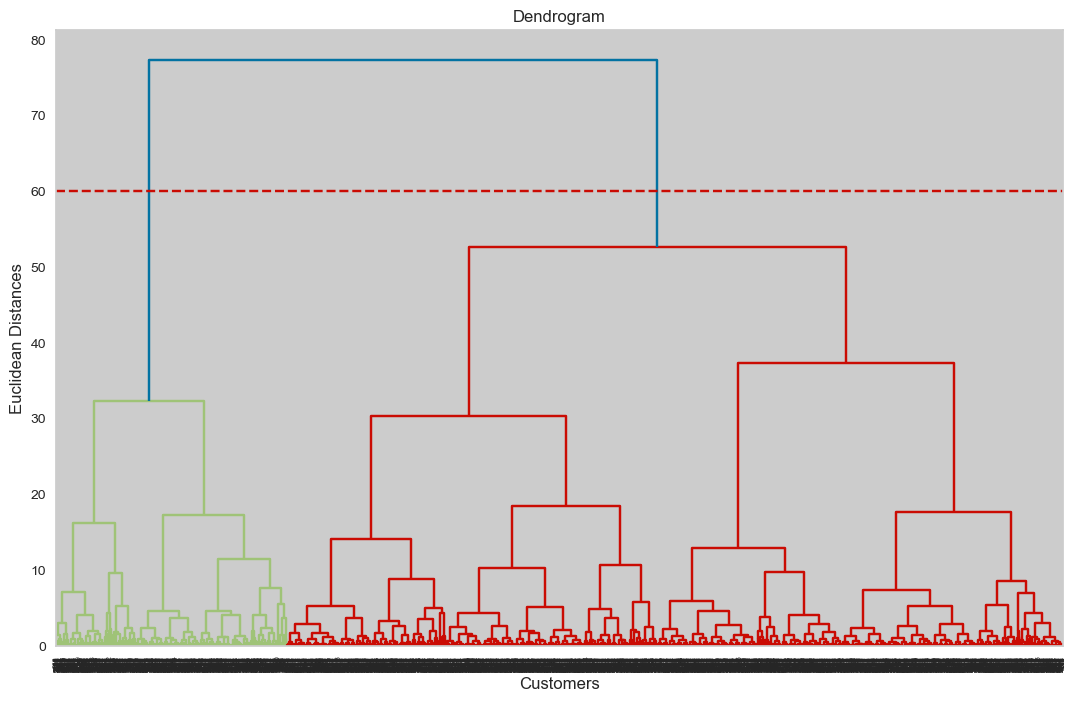

In [147]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=60, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

Le nombre de clusters sera le nombre de lignes verticales qui sont intersectées par la ligne tracée en utilisant le seuil. dans notre cas c'est 2 clusters.

In [148]:
# Fitting hierarchical clustering 
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = h_clustering.fit_predict(X)

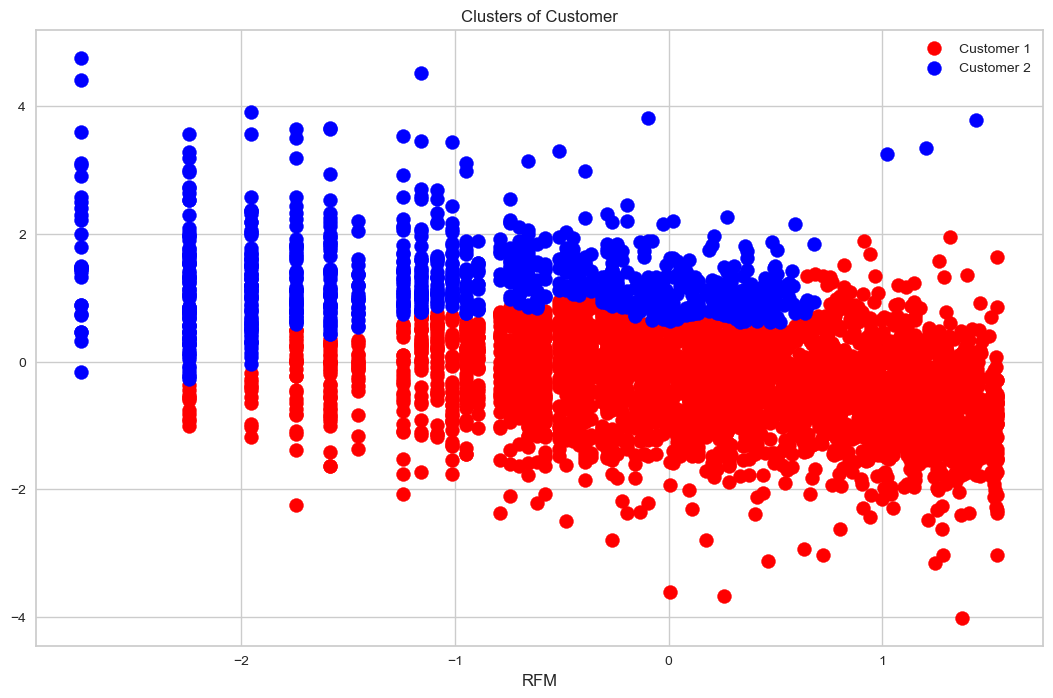

In [158]:
# Visualisation des deux clusters : 
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')


plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.legend()
plt.show()

In [154]:
rfm_dataframe=RFM

In [155]:
rfm_dataframe['Cluster_'] = h_clustering.labels_
rfm_dataframe.head(10)

CustomerID  Recency  Frequency  Monetary  Cluster_
0     12346.0      325          1  77183.60         1
1     12747.0        2        103   4196.01         1
2     12748.0        0       4595  33719.73         1
3     12749.0        3        199   4090.88         1
4     12820.0        3         59    942.34         0
5     12821.0      214          6     92.72         0
6     12822.0       70         46    948.88         0
7     12823.0       74          5   1759.50         1
8     12824.0       59         25    397.12         0
9     12826.0        2         91   1474.72         1

In [156]:
data_process=rfm_dataframe[['Recency','Frequency','Monetary','Cluster_']]

In [159]:
data_process.groupby('Cluster_').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency               Monetary          \
                mean min  max        mean min   max         mean     min   
Cluster_                                                                   
0         111.924197   1  373   45.395233   1   543   612.717353    3.75   
1          23.922136   0  325  241.581758   1  7847  6070.492136  493.28   

                           
                max count  
Cluster_                   
0           7832.47  3021  
1         259657.30   899

# 6.Déploiement du modèle 

In [160]:
import pickle
pickle.dump(h_clustering,open('model_h_clustering.pkl','wb'))

In [161]:
import pickle
pickle.dump(kmeans_model,open('kmeans_model.pkl','wb'))

# The End